In [1]:
import numpy as np

# DGP constants
np.random.seed(123)
n = 6000
n_w = 30
support_size = 5
n_x = 5
# Outcome support
support_Y = np.random.choice(np.arange(n_w), size=support_size, replace=False)
coefs_Y = np.random.uniform(0, 1, size=support_size)
def epsilon_sample(n):
    return np.random.uniform(-1, 1, size=n)
# Treatment support
support_T = support_Y
coefs_T = np.random.uniform(0, 1, size=support_size)
def eta_sample(n):
    return np.random.uniform(-1, 1, size=n)

# Generate controls, covariates, treatments and outcomes
W = np.random.normal(0, 1, size=(n, n_w))
X = np.random.uniform(0, 1, size=(n, n_x))
# Heterogeneous treatment effects
TE1 = np.array([x_i[0] for x_i in X])
TE2 = np.array([x_i[0]**2 for x_i in X]).flatten()
T = np.dot(W[:, support_T], coefs_T) + eta_sample(n)
Y = TE1 * T + TE2 * T**2 + np.dot(W[:, support_Y], coefs_Y) + epsilon_sample(n)
# Generate test data
X_test = np.random.uniform(0, 1, size=(100, n_x))
X_test[:, 0] = np.linspace(0, 1, 100)

In [1]:
import pandas as pd

data = pd.read_csv("features.csv")

data.head()

,scene_id,wet_mean,wet_std,dem_mean,dem_std,cap_mean,cap_std,outcome_pre_mean,outcome_pre_std,outcome_post_mean,...,ite_indirect_mean,ite_indirect_std,ite_total_mean,ite_total_std,theta_directXout_mean,theta_directXout_std,theta_out_mean,theta_out_std,theta_mean,theta_std
0,1,0.768158,0.422009,64.378952,22.386531,0.0,0.0,0.095600,0.082439,0.592143,...,0.192427,0.022821,0.592143,0.074387,0.477758,0.004904,0.249100,0.003187,0.522187,0.006542
1,2,0.905380,0.292689,94.023680,23.789066,0.0,0.0,0.085011,0.094904,0.687272,...,0.221940,0.018396,0.687272,0.060696,0.477727,0.004776,0.245665,0.002547,0.514523,0.004503
2,3,0.947266,0.223503,103.384105,15.987604,0.0,0.0,0.103364,0.110441,0.716351,...,0.230953,0.006072,0.716351,0.021634,0.477494,0.006091,0.244617,0.002754,0.512433,0.001725
3,4,0.904892,0.293364,88.248975,15.052856,0.0,0.0,0.073378,0.102897,0.687237,...,0.221973,0.008372,0.687237,0.028149,0.477468,0.005285,0.245616,0.002387,0.514598,0.001989
4,5,0.901764,0.297634,86.249280,11.162309,0.0,0.0,0.101699,0.105849,0.685333,...,0.221186,0.007220,0.685333,0.023589,0.478443,0.005521,0.246197,0.002536,0.514765,0.001646


In [13]:
data.describe()

,scene_id,wet_mean,wet_std,dem_mean,dem_std,cap_mean,cap_std,outcome_pre_mean,outcome_pre_std,outcome_post_mean,...,ite_indirect_mean,ite_indirect_std,ite_total_mean,ite_total_std,theta_directXout_mean,theta_directXout_std,theta_out_mean,theta_out_std,theta_mean,theta_std
count,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3.565000e+03,3.565000e+03,3565.000000,3565.000000,3565.000000,...,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000
mean,1783.000000,0.476978,0.438636,-433.918692,216.401709,4.197241e+04,2.520522e+05,0.088260,0.103333,0.563317,...,0.153126,0.055582,0.562629,0.167983,0.364155,0.044436,0.282563,0.067402,0.975653,0.081527
std,1029.271182,0.222265,0.087651,1861.773938,907.998179,1.721724e+05,1.280287e+06,0.031501,0.036385,0.290272,...,0.100805,0.054353,0.289223,0.163792,0.173147,0.058247,0.152661,0.075683,0.472009,0.101129
min,1.000000,0.000000,0.000000,-9999.000000,0.000000,0.000000e+00,0.000000e+00,-0.037903,0.068268,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.512433,0.000000
25%,892.000000,0.283569,0.431335,1.727104,0.834537,0.000000e+00,0.000000e+00,0.078307,0.093528,0.397081,...,0.100549,0.012612,0.397081,0.035289,0.303254,0.004649,0.245422,0.016070,0.594605,0.006284
50%,1783.000000,0.461670,0.463339,9.806548,2.776222,2.873736e+03,2.000996e+04,0.088619,0.099797,0.501184,...,0.147889,0.041927,0.501164,0.125512,0.469674,0.011278,0.283418,0.037672,0.726507,0.054783
75%,2674.000000,0.650833,0.490401,30.674374,7.810327,2.278676e+04,7.562379e+04,0.098953,0.106725,0.661924,...,0.204901,0.079262,0.661709,0.239823,0.477697,0.073919,0.354199,0.090929,1.478360,0.094919
max,3565.000000,0.982178,0.500000,103.384105,4999.444138,6.145465e+06,3.960960e+07,0.889573,1.322401,2.306652,...,0.691308,0.308193,2.306652,0.912484,0.479364,0.222251,0.835682,0.375372,1.862583,0.492163


In [15]:
df = pd.read_csv("/Users/sayedmorteza/Library/CloudStorage/Box-Box/Caltech Research/Scripts/WetlandCausalML/tabular_data_florida.csv")

df.head()


,Unnamed: 0,scene,CLAIMS_1996_SUM,CLAIMS_2016_SUM,WETLAND_DEV_1996_2016_SHARE,WETLAND_DEV_1996_2016_HECTARES,CAPITAL_1996_SUM,CAPITAL_1996_SD,CAPITAL_2016_SUM,CAPITAL_2016_SD,...,ECO_818,ECO_819,ECO_821,ECO_822,ECO_823,ECO_824,ECO_825,ECO_826,ECO_827,ECO_828
0,1,1,0.0,0.0,0.0,0.0,0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2,2,0.0,0.0,0.0,0.0,0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,3,3,0.0,0.0,0.0,0.0,0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,4,4,0.0,0.0,0.0,0.0,0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,5,5,0.0,0.0,0.0,0.0,0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df.describe()

,Unnamed: 0,scene,CLAIMS_1996_SUM,CLAIMS_2016_SUM,WETLAND_DEV_1996_2016_SHARE,WETLAND_DEV_1996_2016_HECTARES,CAPITAL_1996_SUM,CAPITAL_1996_SD,CAPITAL_2016_SUM,CAPITAL_2016_SD,...,LOG_WETLAND_DEV_1996_2016_HECTARES,CCAP_1996_2016_NoData,CCAP_1996_2016_DevelopedMH,CCAP_1996_2016_DevelopedLO,CCAP_1996_2016_Agriculture,CCAP_1996_2016_LowVeg,CCAP_1996_2016_Forest,CCAP_1996_2016_Wetland,CCAP_1996_2016_ShoreBare,CCAP_1996_2016_Water
count,3566.000000,3566.000000,3566.000000,3.566000e+03,3566.000000,3566.000000,3.566000e+03,3.566000e+03,3.566000e+03,3.566000e+03,...,3566.000000,3193.0,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000
mean,1783.500000,1783.500000,1603.157536,7.568553e+03,0.004088,24.114624,2.622540e+07,2.521833e+05,4.309669e+07,3.867187e+05,...,1.163248,0.0,0.005788,0.009612,-0.004160,-0.001905,-0.005535,-0.008510,0.000875,0.001245
std,1029.559857,1029.559857,17016.390653,4.972854e+04,0.014018,82.680937,1.075936e+08,1.281140e+06,1.817639e+08,1.795555e+06,...,1.687120,0.0,0.016850,0.023371,0.034898,0.041023,0.043621,0.040240,0.008192,0.015604
min,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.0,-0.001099,-0.009079,-0.625732,-0.302414,-0.329315,-0.274841,-0.125275,-0.280212
25%,892.250000,892.250000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.0,0.000000,0.000031,-0.002228,-0.013210,-0.005478,-0.020626,0.000000,-0.000305
50%,1783.500000,1783.500000,0.000000,0.000000e+00,0.000031,0.180000,1.794826e+06,2.001199e+04,2.899745e+06,2.838905e+04,...,0.165514,0.0,0.000351,0.001823,0.000000,-0.000092,0.000000,-0.002197,0.000046,0.000000
75%,2674.750000,2674.750000,0.000000,9.142183e+01,0.000870,5.130000,1.423865e+07,7.568013e+04,2.356112e+07,1.070048e+05,...,1.813195,0.0,0.002056,0.006672,0.002209,0.001232,0.002060,0.000885,0.000839,0.000992
max,3566.000000,3566.000000,618473.371285,1.292821e+06,0.209793,1237.410000,3.840915e+09,3.964133e+07,6.191200e+09,5.420287e+07,...,7.121584,0.0,0.214066,0.267975,0.212891,0.296066,0.248779,0.278641,0.157639,0.367126


In [17]:
data.describe()

,scene_id,wet_mean,wet_std,dem_mean,dem_std,cap_mean,cap_std,outcome_pre_mean,outcome_pre_std,outcome_post_mean,...,ite_indirect_mean,ite_indirect_std,ite_total_mean,ite_total_std,theta_directXout_mean,theta_directXout_std,theta_out_mean,theta_out_std,theta_mean,theta_std
count,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3.565000e+03,3.565000e+03,3565.000000,3565.000000,3565.000000,...,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000
mean,1783.000000,0.476978,0.438636,-433.918692,216.401709,4.197241e+04,2.520522e+05,0.088260,0.103333,0.563317,...,0.153126,0.055582,0.562629,0.167983,0.364155,0.044436,0.282563,0.067402,0.975653,0.081527
std,1029.271182,0.222265,0.087651,1861.773938,907.998179,1.721724e+05,1.280287e+06,0.031501,0.036385,0.290272,...,0.100805,0.054353,0.289223,0.163792,0.173147,0.058247,0.152661,0.075683,0.472009,0.101129
min,1.000000,0.000000,0.000000,-9999.000000,0.000000,0.000000e+00,0.000000e+00,-0.037903,0.068268,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.512433,0.000000
25%,892.000000,0.283569,0.431335,1.727104,0.834537,0.000000e+00,0.000000e+00,0.078307,0.093528,0.397081,...,0.100549,0.012612,0.397081,0.035289,0.303254,0.004649,0.245422,0.016070,0.594605,0.006284
50%,1783.000000,0.461670,0.463339,9.806548,2.776222,2.873736e+03,2.000996e+04,0.088619,0.099797,0.501184,...,0.147889,0.041927,0.501164,0.125512,0.469674,0.011278,0.283418,0.037672,0.726507,0.054783
75%,2674.000000,0.650833,0.490401,30.674374,7.810327,2.278676e+04,7.562379e+04,0.098953,0.106725,0.661924,...,0.204901,0.079262,0.661709,0.239823,0.477697,0.073919,0.354199,0.090929,1.478360,0.094919
max,3565.000000,0.982178,0.500000,103.384105,4999.444138,6.145465e+06,3.960960e+07,0.889573,1.322401,2.306652,...,0.691308,0.308193,2.306652,0.912484,0.479364,0.222251,0.835682,0.375372,1.862583,0.492163


(array([721., 345., 258., 212., 161.,  86.,  89.,  72.,  88., 109., 117.,
         92., 100.,  71.,  78.,  70.,  74.,  71.,  88.,  78.,  73.,  58.,
         41.,  32.,  27.,  27.,  27.,  21.,  23.,  19.,  16.,  20.,  13.,
         25.,  16.,  10.,  18.,  12.,  10.,   4.,  11.,   5.,  11.,   4.,
          0.,   2.,   1.,   1.,   0.,   1.]),
 array([ -1.14910742,   0.94155684,   3.03222109,   5.12288534,
          7.2135496 ,   9.30421385,  11.3948781 ,  13.48554236,
         15.57620661,  17.66687086,  19.75753512,  21.84819937,
         23.93886363,  26.02952788,  28.12019213,  30.21085639,
         32.30152064,  34.39218489,  36.48284915,  38.5735134 ,
         40.66417765,  42.75484191,  44.84550616,  46.93617041,
         49.02683467,  51.11749892,  53.20816318,  55.29882743,
         57.38949168,  59.48015594,  61.57082019,  63.66148444,
         65.7521487 ,  67.84281295,  69.9334772 ,  72.02414146,
         74.11480571,  76.20546996,  78.29613422,  80.38679847,
         82.477462

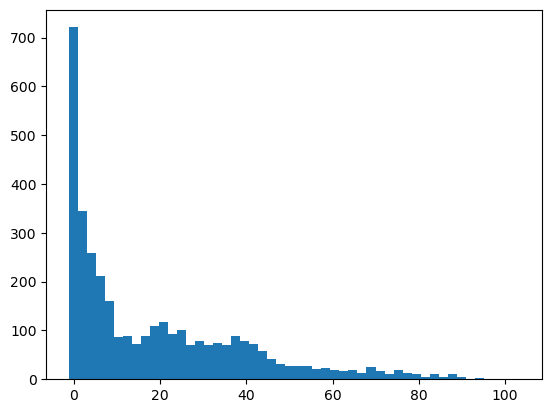

In [23]:
plt.hist(df['DEM_MEAN'], bins=50)